In [47]:
import numpy as np

In [2]:
def processText(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: reddit submission or comment text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [13]:
csv1=pd.read_csv('dataFromReddit_ProgrammingLanguages.csv')

In [14]:
len(csv1)

857

In [15]:
csv2=pd.read_csv('dataFromReddit_programming.csv')

In [16]:
len(csv2)

752

In [25]:
import sys
import json
import string
import pandas as pd
from collections import Counter
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as mpl


# load csv file
fCsvName = 'dataFromReddit_ProgrammingLanguages.csv'


# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:

# number of most frequent terms to display
freqNum = 30

# read csv data
csvPD=pd.read_csv(fCsvName)
title_list = csv1['Title'].tolist()+csv1['Body'].tolist()+csv2['Title'].tolist()+csv2['Body'].tolist()
title_list = [x for x in title_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in title_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

    # update count
    termFreqCounter.update(lTokens)

freqList = termFreqCounter.most_common(freqNum)
    
# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))

languag: 1801
program: 1140
compil: 447
type: 434
code: 354
use: 353
thi: 352
function: 339
design: 297
like: 276
implement: 268
c: 258
new: 246
whi: 241
write: 235
work: 235
featur: 220
make: 219
system: 217
interpret: 212
ani: 206
would: 200
ha: 198
syntax: 189
rust: 182
gener: 182
i'm: 171
one: 169
wa: 169
think: 161


In [50]:
# get coding language key words
key = ['c', 'python', 'java', 'javascript', 'js','c#','ruby','c++']

In [51]:
coding_list = [(t,f) for t,f in termFreqCounter.items() if t in key]

In [52]:
coding_list

[('python', 139), ('js', 22), ('javascript', 52), ('java', 64), ('c', 258)]

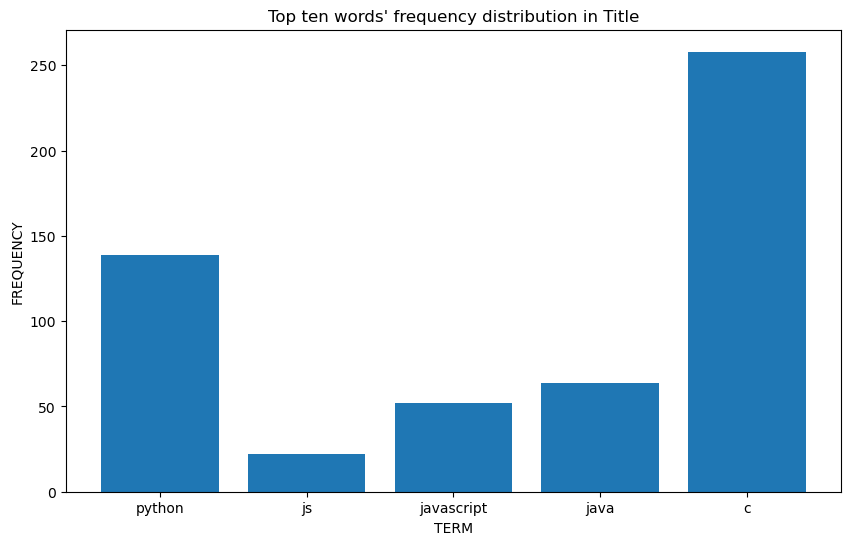

In [53]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("Top ten words\' frequency distribution in Title")
mpl.ylabel('FREQUENCY')
mpl.xlabel('TERM')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()

In [54]:
termFreqCounter2 = Counter()
comment_list = csv1['TopComment'] + csv2['TopComment']
comment_list = [x for x in comment_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))]
for submission in  comment_list:
    lTokens = processText(text=submission, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

    # update count
    termFreqCounter2.update(lTokens)

# print out most common terms
for term, count in termFreqCounter2.most_common(freqNum):
    if term != "’" and term != "‘":
        print(term + ': ' + str(count))
        # remove quotation marks
freqList = termFreqCounter2.most_common(30)

coding_list = [(t,f) for t,f in termFreqCounter2.items() if t in key]

thi: 490
use: 313
like: 284
languag: 277
wa: 229
work: 225
one: 220
it': 219
code: 202
get: 193
think: 191
program: 183
make: 182
would: 177
also: 168
thing: 165
ha: 160
time: 152
type: 150
realli: 149
need: 146
even: 143
ani: 142
good: 139
veri: 139
compil: 137
want: 136
becaus: 134
way: 132
go: 132


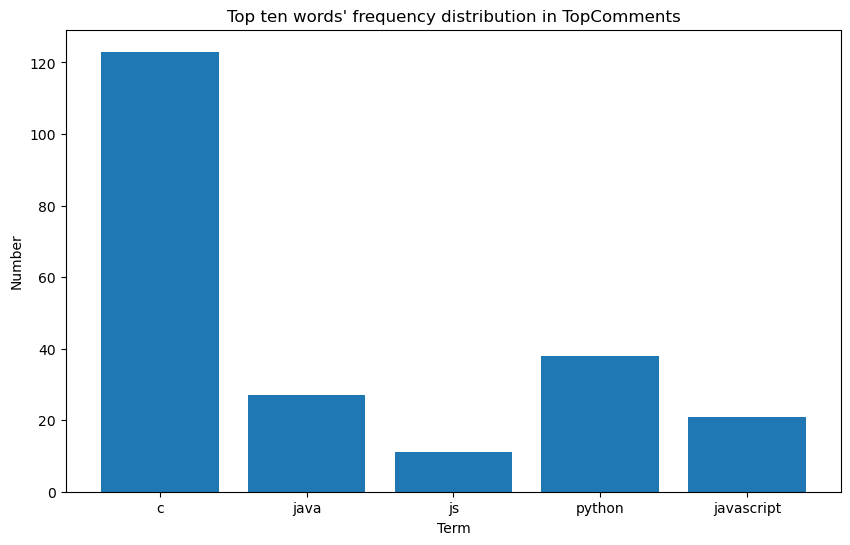

In [56]:
# construct the x and y values
y = [s[1] for s in coding_list]

x = [s[0] for s in coding_list]
# use matplotlib bar chat to plot this
mpl.bar(x, y)
mpl.title("Top ten words\' frequency distribution in TopComments")
mpl.ylabel('Number')
mpl.xlabel('Term')
mpl.rcParams['figure.figsize'] = (10.0, 6.0)
mpl.show()